In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import seaborn as sns

In [48]:
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

#Solving dataframe issues
income_2016.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2017.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2018.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2020['Nom_Districte']=income_2020['Nom_Districte'].replace('L\'Eixample','Eixample')
income_2020['Nom_Barri']=income_2020['Nom_Barri'].replace('el Barri Gòtic','el Gòtic').replace('Sant Gervasi- Galvany','Sant Gervasi - Galvany').replace('Sant Gervasi- la Bonanova','Sant Gervasi - la Bonanova').replace('Sants-Badal','Sants - Badal')
income_2016['Nom_Barri']=income_2016['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
income_2017['Nom_Barri']=income_2017['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
income_2018['Nom_Barri']=income_2018['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
income_2019['Nom_Barri']=income_2019['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
barris=income_2016['Nom_Barri'].dropna().tolist()
print(barris)

['el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Raval', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'el Gòtic', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'la Barceloneta', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la Ribera', 'Sant Pere, Santa Caterina i la

In [49]:
#Merging the dataframes of all years into one
incomearray=[income_2016,income_2017,income_2018,income_2019,income_2020]
income_df=pd.concat(incomearray)
income_df.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Seccio_Censal', 'Import_Euros'],
      dtype='object')

In [50]:
#We erase the column about secció censal and merge all the rows from the same district
income_df.drop('Seccio_Censal', axis=1)
income_df_refined=income_df.groupby('Nom_Districte').agg({'Codi_Districte':'mean','Import_Euros': 'mean'}).reset_index()
income_df_refined['Codi_Districte']=income_df_refined['Codi_Districte'].astype(int)

income_df_refined
# print(euros)

,Nom_Districte,Codi_Districte,Import_Euros
0,Ciutat Vella,1,11268.029630
1,Eixample,2,18309.000000
2,Gràcia,6,17588.006897
3,Horta-Guinardó,7,14527.138211
4,Les Corts,4,21314.396491
5,Nou Barris,8,11912.095726
6,Sant Andreu,9,14457.814737
7,Sant Martí,10,14664.900680
8,Sants-Montjuïc,3,14010.560684
9,Sarrià-Sant Gervasi,5,25172.730612


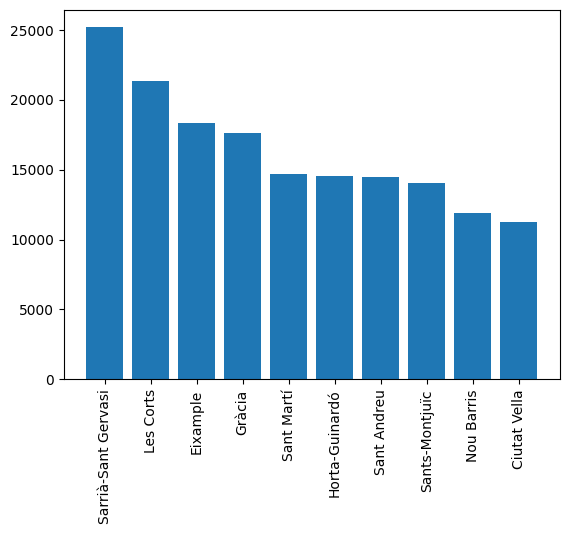

In [51]:
#We make a bar plot to have some intuition on which district is the richest
income_df_refinedforbars=income_df_refined.sort_values('Import_Euros',ascending=False)
plt.bar(income_df_refinedforbars['Nom_Districte'], income_df_refinedforbars['Import_Euros'])
plt.xticks(rotation=90)
plt.show()

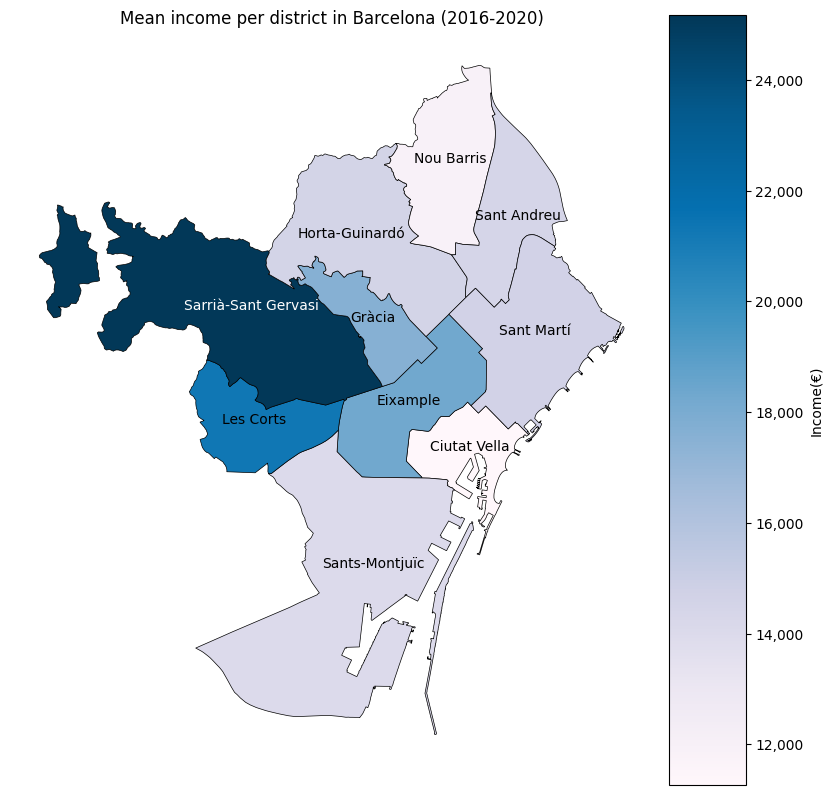

In [67]:
#General map, we read the shp file and make the dataframe
data_dir = 'Data/'
mapofbarcelonadistricts = gpd.read_file(data_dir + "0301040100_Districtes_UNITATS_ADM.shp") 
mapofbarcelonadistricts["DISTRICTE"]=mapofbarcelonadistricts["DISTRICTE"].astype(int)
mapofbarcelonadistrictswincome=mapofbarcelonadistricts.merge(income_df_refined, left_on='DISTRICTE',right_on='Codi_Districte')

#Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
mapofbarcelonadistrictswincome.plot(column='Import_Euros', ax=ax, cmap='PuBu', edgecolor='black', linewidth=0.5)

#Add colorbar and title
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.02, aspect=10)
plt.title("Mean income per district in Barcelona (2016-2020)")
cbar.ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
cbar.ax.set_ylabel("Income(€)")

#Add district names, some repositions of the text were needed
for x, y, label in zip(mapofbarcelonadistrictswincome.geometry.centroid.x, mapofbarcelonadistrictswincome.geometry.centroid.y, mapofbarcelonadistrictswincome['Nom_Districte']):
#     print(label)
    if label=='Horta-Guinardó':
        ax.annotate(label, xy=(x, y), xytext=(-50, 0), textcoords='offset points')
    elif label=='Gràcia':
        ax.annotate(label, xy=(x, y), xytext=(-15, 0), textcoords='offset points')
    elif label=='Sants-Montjuïc':
        ax.annotate(label, xy=(x, y), xytext=(-15, 15), textcoords='offset points')
    elif label=='Sant Andreu':
        ax.annotate(label, xy=(x, y), xytext=(-25, -5), textcoords='offset points')
    elif label=='Sarrià-Sant Gervasi':
        ax.annotate(label, xy=(x, y), xytext=(-25, 0), textcoords='offset points',color='white')
    else:      
        ax.annotate(label, xy=(x, y), xytext=(-25, 0), textcoords='offset points')

ax.axis('off')

# Show the plot
plt.show()

In [53]:
income_df_refinedforboxplot=income_df.groupby(['Nom_Districte','Nom_Barri']).agg({'Codi_Districte':'mean','Codi_Barri':'mean','Import_Euros': 'mean'}).reset_index()
income_df_refinedforboxplot['Codi_Districte']=income_df_refinedforboxplot['Codi_Districte'].astype(int)
income_df_refinedforboxplot['Codi_Barri']=income_df_refinedforboxplot['Codi_Barri'].astype(int)
barris=income_df_refinedforboxplot['Nom_Barri'].dropna().tolist()
print(barris, len(barris))

['Sant Pere, Santa Caterina i la Ribera', 'el Gòtic', 'el Raval', 'la Barceloneta', 'Sant Antoni', 'el Fort Pienc', "l'Antiga Esquerra de l'Eixample", "la Dreta de l'Eixample", "la Nova Esquerra de l'Eixample", 'la Sagrada Família', 'Vallcarca i els Penitents', "el Camp d'en Grassot i Gràcia Nova", 'el Coll', 'la Salut', 'la Vila de Gràcia', 'Can Baró', 'Horta', 'Montbau', 'Sant Genís dels Agudells', 'el Baix Guinardó', 'el Carmel', 'el Guinardó', 'la Clota', "la Font d'en Fargues", 'la Teixonera', "la Vall d'Hebron", 'Pedralbes', 'la Maternitat i Sant Ramon', 'les Corts', 'Can Peguera', 'Canyelles', 'Ciutat Meridiana', 'Porta', 'Torre Baró', 'Vallbona', 'Verdun', 'Vilapicina i la Torre Llobeta', 'el Turó de la Peira', 'la Guineueta', 'la Prosperitat', 'la Trinitat Nova', 'les Roquetes', 'Baró de Viver', 'Navas', 'Sant Andreu', 'el Bon Pastor', 'el Congrés i els Indians', 'la Sagrera', 'la Trinitat Vella', 'Diagonal Mar i el Front Marítim del Poblenou', 'Provençals del Poblenou', 'Sant

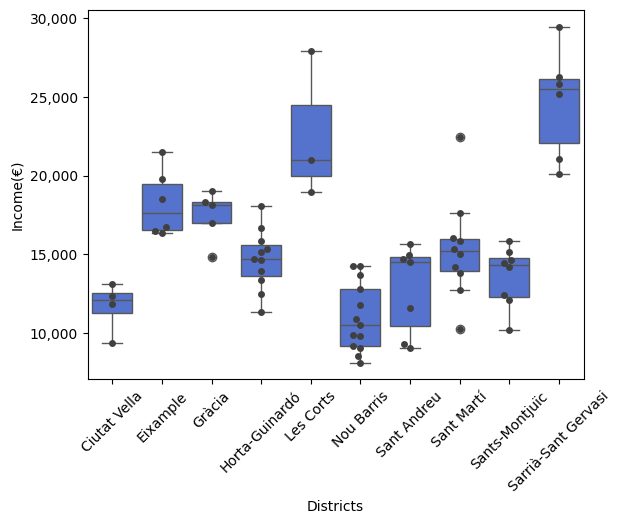

In [66]:

# Create a boxplot
sns.boxplot(x='Nom_Districte', y='Import_Euros', data=income_df_refinedforboxplot,color='royalblue')
# Add swarmplot for individual data points
sns.swarmplot(x='Nom_Districte', y='Import_Euros', data=income_df_refinedforboxplot, color=".25")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylabel('Income(€)')
plt.xlabel('Districts')
plt.xticks(rotation=45)
# Show the plot
plt.show()
#The data plotted is the mean income for each neighborhood over the years!!!